In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import os
import seaborn as sns
from scipy import stats
import locale
locale.setlocale(locale.LC_ALL, '')

from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#Functions we created:
from modules import dem_fx
from modules import transaction_fx as trns
from modules import plot_functions as plt_fx
from modules import ml_functions as ml_fx

os.getcwd()

#Allows reload of modules:
%load_ext autoreload
%autoreload

In [3]:
hh_demographic_fxd = pd.read_csv("saved_structures/hh_demographic_fix_hhcomp.csv", sep = '\t')
hh_demographic_fxd.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HOUSEHOLD_SIZE_DESC,KIDS_DESC,household_key
0,65+,M,35-49K,Homeowner,2,0,1
1,45-54,M,50-74K,Homeowner,2,0,7
2,25-34,M,25-34K,Unknown,3,1,8
3,25-34,M,75-99K,Homeowner,4,2,13
4,45-54,S,50-74K,Homeowner,1,0,16


In [6]:
updated_prod = pd.read_csv("saved_structures/updated_prod.csv", sep = '\t')
updated_prod.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,LABEL
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB,FROZEN
1,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,,BAKERY
2,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ,PRODUCE
3,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ,PROCESSED FOODS
4,26426,69,GROCERY,Private,SPICES & EXTRACTS,SPICES & SEASONINGS,2.5 OZ,CONDIMENTS


In [7]:
trans_clean = pd.read_csv("saved_structures/trans_clean.csv", sep = '\t')
trans_clean.head()

FileNotFoundError: [Errno 2] File b'saved_structures/trans_clean.csv' does not exist: b'saved_structures/trans_clean.csv'

In [5]:
participation_per_hh = pd.read_csv("saved_structures/participation_per_hh.csv", sep = '\t')

,household_key,participation_length
0,1,66
1,2,35
2,3,36
3,4,25
4,5,27


In [6]:
weekly_cart_df = pd.read_csv("saved_structures/weekly_cart_df.csv", sep = '\t')
weekly_cart_df.head()

,household_key,PRODUCE_QUANT,PROCESSED FOODS_QUANT,HOUSEHOLDS_QUANT,MEAT & SEAFOOD_QUANT,DAIRY_QUANT,CONDIMENTS_QUANT,BEVERAGES_QUANT,PET_QUANT,SMOKING_QUANT,FROZEN_QUANT,TECHNOLOGY_QUANT,PHARMACY_QUANT,BAKERY_QUANT,TOYS_QUANT,STATIONERY_QUANT,ALCOHOL_QUANT
0,1,6.409091,10.303030,2.606061,2.287879,2.681818,0.606061,1.666667,0.136364,0.075758,0.545455,0.545455,0.151515,0.848485,0.015152,0.030303,0.000000
1,2,4.485714,4.685714,4.000000,2.285714,2.400000,0.742857,2.371429,0.828571,0.285714,0.200000,0.114286,0.114286,0.114286,0.057143,0.314286,0.028571
2,3,8.166667,17.888889,1.277778,5.472222,1.138889,1.500000,3.444444,1.888889,0.055556,2.000000,0.055556,0.055556,0.694444,0.055556,0.333333,0.000000
3,4,0.920000,4.320000,1.720000,1.800000,1.760000,0.640000,0.440000,0.000000,0.600000,2.000000,0.000000,0.120000,0.560000,0.000000,0.000000,0.040000
4,5,0.888889,1.481481,1.481481,1.000000,0.814815,0.370370,1.185185,0.111111,0.074074,0.259259,0.111111,0.407407,0.222222,0.000000,0.222222,0.111111


In [38]:
weekly_cart_df.sort_values(by="household_key", inplace=True)
weekly_cart_np = weekly_cart_df.to_numpy()[:, 1:]

(2500, 2)


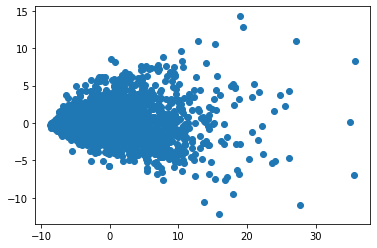

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(weekly_cart_np)
weekly_cart_np_pca = pca.transform(weekly_cart_np)

print(weekly_cart_np_pca.shape)
plt.scatter(weekly_cart_np_pca[:,0], weekly_cart_np_pca[:,1])

In [46]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0, algorithm="elkan").fit(weekly_cart_np)
print(kmeans.labels_)

[2 2 1 ... 0 2 2]


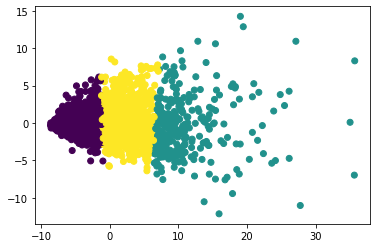

In [47]:
plt.scatter(weekly_cart_np_pca[:,0], weekly_cart_np_pca[:,1], c=kmeans.labels_)

In [67]:
hh_key = [i for i in range(len(kmeans.labels_))]

hh_to_clust = pd.DataFrame(np.array([hh_key, kmeans.labels_]).T, index=None, columns=["household_key", "clust"], dtype=int)

hh_demographic_clust =\
    hh_demographic_fxd.join(hh_to_clust, on="household_key", lsuffix="_clust").drop("household_key_clust", axis=1)
hh_demographic_clust.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HOUSEHOLD_SIZE_DESC,KIDS_DESC,household_key,clust
0,65+,M,35-49K,Homeowner,2,0,1,2
1,45-54,M,50-74K,Homeowner,2,0,7,2
2,25-34,M,25-34K,Unknown,3,1,8,0
3,25-34,M,75-99K,Homeowner,4,2,13,0
4,45-54,S,50-74K,Homeowner,1,0,16,2


In [7]:
def create_weekly_dep_df(trans_clean, participation_per_hh):
    
    grouped_per_dep = pd.DataFrame(trans_clean.groupby(['DEPARTMENT','household_key']).sum())
    index = trans_clean['household_key'].sort_values().unique()

    weekly_dep_df = pd.DataFrame(index = index)
    weekly_dep_df.index.name = 'household_key'

    for dep in trans_clean['DEPARTMENT'].unique(): 
        data = [grouped_per_dep.loc[dep, i]['QUANTITY']/(participation_per_hh['participation_length'][i])\
                for i in grouped_per_dep.loc[dep].index]
        
        intermediary_df = pd.DataFrame(index = grouped_per_dep.loc[dep].index, data = {dep +'_QUANT': data})

        weekly_dep_df = weekly_dep_df.join(intermediary_df)

    #Fill NaN values with 0.0:
    weekly_dep_df = weekly_dep_df.fillna(0.0)
    
    return weekly_dep_df

In [8]:
weekly_dep_df = create_weekly_dep_df(trans_clean, participation_per_hh.set_index("household_key"))

In [10]:
weekly_dep_df.head()

,PRODUCE_QUANT,GROCERY_QUANT,DRUG GM_QUANT,MEAT_QUANT,MEAT-PCKGD_QUANT,DELI_QUANT
household_key,,,,,,
1,3.166667,19.848485,3.045455,0.075758,1.772727,1.030303
2,2.485714,15.542857,3.142857,0.971429,0.657143,0.371429
3,1.111111,34.750000,2.972222,1.916667,3.138889,0.166667
4,0.120000,11.560000,1.480000,0.400000,1.360000,0.120000
5,0.074074,5.148148,2.000000,0.370370,0.481481,0.777778


In [25]:
weekly_dep_np = weekly_dep_df.to_numpy()

(2500, 2)


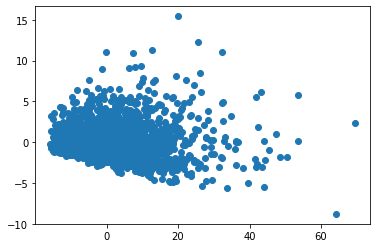

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(weekly_dep_np)
weekly_dep_np_pca = pca.transform(weekly_dep_np)

print(weekly_dep_np_pca.shape)
plt.scatter(weekly_dep_np_pca[:,0], weekly_dep_np_pca[:,1])